## **Web Scraping NBA Statistics using Pandas Library in Python**
**Tiffany Der**



In this mini project, I will be web scraping a season of NBA player statistics data off of a website using Pandas read_html() function. The results will be saved into Pandas dataframes to conduct a basic cleaning and a few visualizations. 

## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame

## Identify the URL to perform web scraping 

The website I will be using for this mini project will be from Basketball-Reference.com's website.

I will be webscraping the NBA's  2019-2020 season Per Game Play Statistics. 

The 2019-2020 season's URL is https://www.basketball-reference.com/leagues/NBA_2020_per_game.html




## Save the URL as a variable


In [ ]:
# Save each web URL with the basketball statistics into separate string variables.

url_19_20 = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'


## Read HTML webpages into Pandas

In [ ]:
import pandas as pd

# table #1 - 2018-2019 season
# Save the html webpage into a pandas dataframe
df = pd.read_html(url_18_19, header = 0, na_values=[""])
df = df[0]




## Look at the dataset

In [ ]:
# Take a look at the 2018-2019 Season's dataframe

print('2019-2020 Per Game Average Statistics')
df.head()

2019-2020 Per Game Average Statistics


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


## Basic Data Cleaning

Check for Data Types

In [ ]:
df.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

### Change data types to floats

In [ ]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
df['Age'] = df['Age'].astype(float)
df['G'] = df['G'].astype(float)
df['GS'] = df['GS'].astype(float)
df['MP'] = df['MP'].astype(float)
df['FG'] = df['FG'].astype(float)
df['FGA'] = df['FGA'].astype(float)
df['FG%'] = df['FG%'].astype(float)
df['3P'] = df['3P'].astype(float)
df['2P'] = df['2P'].astype(float)
df['2PA'] = df['2PA'].astype(float)
df['2P%'] = df['2P%'].astype(float)
df['STL'] = df['STL'].astype(float)
df['AST'] = df['AST'].astype(float)
df['FT%'] = df['FT%'].astype(float)

df.dtypes

Rk         object
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA        object
3P%        object
2P        float64
2PA       float64
2P%       float64
eFG%       object
FT         object
FTA        object
FT%       float64
ORB        object
DRB        object
TRB        object
AST       float64
STL       float64
BLK        object
TOV        object
PF         object
PTS        object
dtype: object

### Dropping and replacing missing values

In [ ]:
# Check for number of missing values

total_missing = df.isnull().sum().sum()
print('there are', total_missing, 'total missing values')

there are 0 total missing values


In [ ]:
# Find out what columns these missing values are and how many are in each column.
where_missing = df.isnull().sum()
where_missing

# There are 4 columns with missing values - FG% 6, 3P%(47), 2P%(15), FT%(43)

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

### Replace all NA/Null values with the number 0

In [ ]:
# Replace all NA 
df = df.fillna(0)

In [ ]:
total_na = df.isna().sum().sum()
total_null = df.isnull().sum().sum()    

print(total_na, total_null)

0 0


### Drop every duplicated header row
Every 20 rows in the dataset there is a row that serves as a table header row.
Let's delete those columns.

In [ ]:
df[df.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [ ]:
len(df[df['Age'] == 'Age'])
df = df.drop(df[df.Age == 'Age'].index)
result = len(df[df['Age'] == 'Age'])

print('There are', result, 'table header rows left')

There are 0 table header rows left


### Basic Plots

### Average Points Per Game Distributed among Players
Most players score between 1 and 20 points a game. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


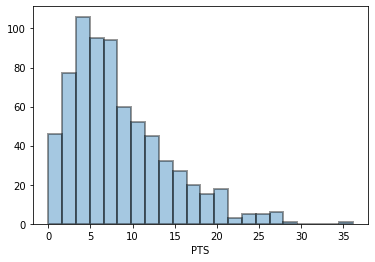

In [ ]:
sns.distplot(df.PTS, label='Average Points Per Game Distributed among Players',
             kde=False,
            hist_kws=dict(edgecolor="black", linewidth=2,))

### Correlation of Average 3 Pointers per Game to Average Steals per Game
The more 3-pointers a player made in a game, the more steals are generally made as well. 

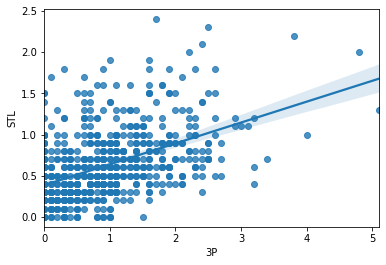

In [ ]:
sns.regplot(data = df, x='3P', y='STL')

Shooting Guards average the most steals per game.

In [ ]:
df.groupby(["Pos"])["STL"].max(5).sort_values(ascending=False)

Pos
SG       2.4
SF       2.3
PG       2.0
SF-SG    1.9
C        1.7
PF       1.6
PF-SF    0.6
SG-SF    0.5
SG-PF    0.4
C-PF     0.3
Name: STL, dtype: float64